Deze oefening illustreert hoe je met de `scipy.stats`-bibliotheek werkt om kansen (probabilities), dichtheden (pdf/pmf) en kwantielen (quantiles/percentiles) te berekenen voor:
- **Normale verdeling** (`norm`)
- **Binomiale verdeling** (`binom`)
- **Exponentiële verdeling** (`expon`)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, expon  # this allows us to simply write norm instead of scipy.stats.norm


In [3]:
# Probability that a normally distributed variable 
# (with mean 0 and standard deviation 1) is smaller or equal than 0
print(norm.cdf(0))

0.5


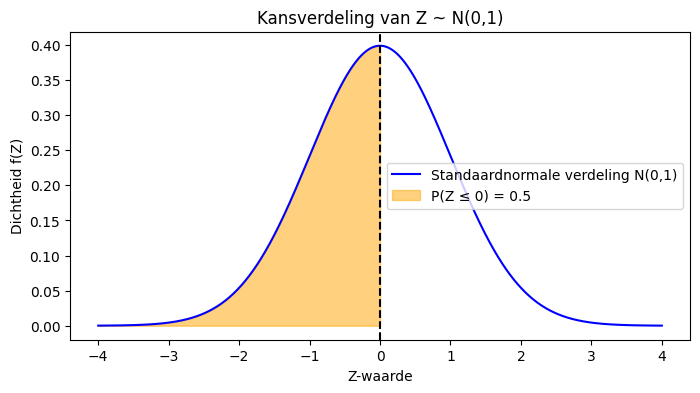

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Waarden genereren rond het gemiddelde
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # dichtheidsfunctie

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Standaardnormale verdeling N(0,1)', color='blue')

# Gebied links van 0 inkleuren
x_fill = np.linspace(-4, 0, 500)
plt.fill_between(x_fill, norm.pdf(x_fill, 0, 1), color='orange', alpha=0.5,
                 label='P(Z ≤ 0) = 0.5')

# Verticale lijn bij 0
plt.axvline(0, color='black', linestyle='--')

# Labels en titel
plt.title('Kansverdeling van Z ~ N(0,1)')
plt.xlabel('Z-waarde')
plt.ylabel('Dichtheid f(Z)')
plt.legend()
plt.show()

# De kans dat een standaardnormaal 
# verdeelde variabele kleiner of gelijk is aan nul bedraagt 50%.
# Dit komt omdat de verdeling symmetrisch is ten opzichte van het gemiddelde (0).
# Grafisch betekent dit dat precies de helft van de oppervlakte onder de curve links van 0 ligt.

In [5]:
#%% Probability that a normally distributed variable 
# (with mean 1 and standard deviation 2) is smaller or equal than 0
print(norm.cdf(0, loc=1, scale=2)) # or
print(norm(loc=1, scale=2).cdf(0))

0.3085375387259869
0.3085375387259869


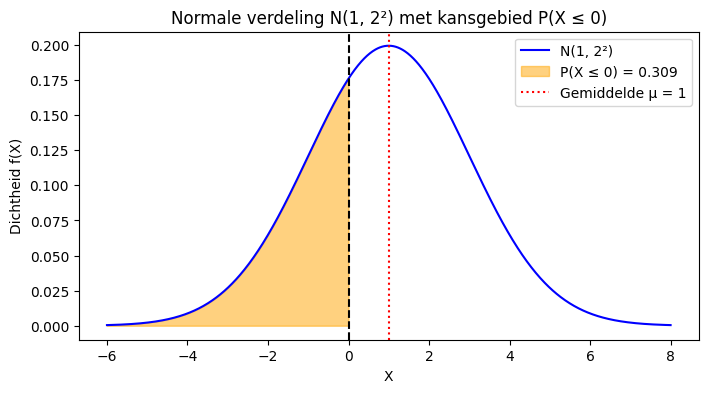

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 1
sigma = 2

# Waarden voor de curve
x = np.linspace(-6, 8, 1000)
y = norm.pdf(x, mu, sigma)

# Plot de verdeling
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f'N({mu}, {sigma}²)', color='blue')

# Gebied links van 0 inkleuren
x_fill = np.linspace(-6, 0, 500)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), color='orange', alpha=0.5,
                 label=f'P(X ≤ 0) = {norm.cdf(0, mu, sigma):.3f}')

# Verticale lijn bij 0 en bij het gemiddelde
plt.axvline(0, color='black', linestyle='--')
plt.axvline(mu, color='red', linestyle=':', label='Gemiddelde μ = 1')

# Opmaak
plt.title('Normale verdeling N(1, 2²) met kansgebied P(X ≤ 0)')
plt.xlabel('X')
plt.ylabel('Dichtheid f(X)')
plt.legend()
plt.show()


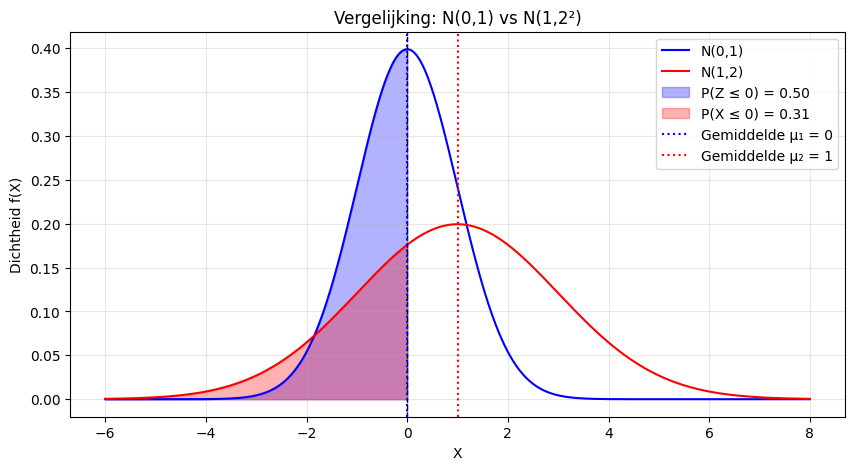

In [7]:
#%% Vergelijking: standaardnormale N(0,1) vs N(1,2)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definieer parameters
mu1, sigma1 = 0, 1     # standaardnormaal
mu2, sigma2 = 1, 2     # verschoven en breder

# X-as
x = np.linspace(-6, 8, 1000)

# PDF's (dichtheden)
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# Plot beide curves
plt.figure(figsize=(10, 5))
plt.plot(x, y1, color='blue', label='N(0,1)')
plt.plot(x, y2, color='red', label='N(1,2)')

# Gebieden links van 0 inkleuren
x_fill1 = np.linspace(-6, 0, 500)
x_fill2 = np.linspace(-6, 0, 500)

plt.fill_between(x_fill1, norm.pdf(x_fill1, mu1, sigma1),
                 color='blue', alpha=0.3,
                 label=f'P(Z ≤ 0) = {norm.cdf(0, mu1, sigma1):.2f}')
plt.fill_between(x_fill2, norm.pdf(x_fill2, mu2, sigma2),
                 color='red', alpha=0.3,
                 label=f'P(X ≤ 0) = {norm.cdf(0, mu2, sigma2):.2f}')

# Verticale lijnen bij 0 en bij gemiddelden
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(mu1, color='blue', linestyle=':', label='Gemiddelde μ₁ = 0')
plt.axvline(mu2, color='red', linestyle=':', label='Gemiddelde μ₂ = 1')

# Opmaak en labels
plt.title('Vergelijking: N(0,1) vs N(1,2²)')
plt.xlabel('X')
plt.ylabel('Dichtheid f(X)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Conclusie – Vergelijking van N(0,1) en N(1,2)

De kans dat een normaal verdeelde variabele **kleiner of gelijk is aan nul** verschilt afhankelijk van het gemiddelde (μ) en de standaarddeviatie (σ).

### Samenvatting van resultaten

| Verdeling | Gemiddelde (μ) | Standaarddeviatie (σ) | \( P(X \le 0) \) |
|------------|----------------|------------------------|------------------|
| \( N(0,1) \) | 0 | 1 | 0.50 |
| \( N(1,2) \) | 1 | 2 | 0.31 |

### Interpretatie

- De **standaardnormale verdeling** \( N(0,1) \) is symmetrisch rond nul,  
  daarom ligt precies de helft (50 %) van de waarden **links van 0**.  

- Bij \( N(1,2) \) is het **gemiddelde verschoven naar rechts (μ = 1)** en de spreiding groter (σ = 2).  
  Daardoor ligt een **kleiner deel van de curve links van nul**, namelijk ongeveer **31 %**.

- Dit verschil komt voort uit de **standaardisatie**:
  \[
  Z = \frac{X - \mu}{\sigma}
  \]
  Voor \( X = 0 \) bij \( N(1,2) \) geldt:
  \[
  Z = \frac{0 - 1}{2} = -0.5 \quad \Rightarrow \quad P(Z \le -0.5) = 0.3085
  \]

### Conclusie in woorden

> Naarmate het **gemiddelde** stijgt (de verdeling naar rechts verschuift),  
> neemt de kans af dat de variabele een waarde kleiner dan nul aanneemt.  
> Een grotere **standaarddeviatie** maakt de verdeling breder,  
> maar verandert de relatieve kansverdeling niet symmetrisch — ze spreidt het effect enkel uit.


In [8]:
#%% Probability that to get exactly 1 times head 
# in 2 coin tosses (pmf = probability mass function => 
# only for discrete distributions)
print(binom.pmf(1, n=2, p=0.5))
# see also
help(binom.pmf)

0.5000000000000002
Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Probability mass function at k of the given RV.

    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).

    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k



In [9]:
#%% Throw a fair coin 10 times and count the number of heads (repeat this function to see that you really get a random result)
print(binom.rvs(n=10, p=0.5, size=10))
# or
print(binom(n=10, p=0.5).rvs(10))

[5 5 5 5 3 4 5 7 7 6]
[3 5 4 4 5 5 5 2 5 7]


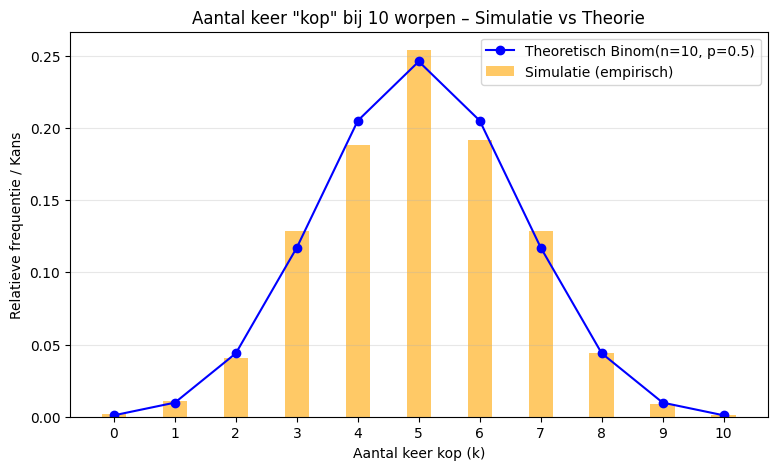

In [10]:
#%% 🎲 Simulatie van muntgooien (grafisch)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10      # aantal worpen per experiment
p = 0.5     # kans op kop
N = 1000    # aantal herhalingen van het experiment

# Simuleer 1000 experimenten van 10 worpen
sim_results = binom.rvs(n=n, p=p, size=N)

# Tel hoe vaak elk aantal 'koppen' voorkomt
values, counts = np.unique(sim_results, return_counts=True)

# Bereken theoretische kansverdeling
x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

# Plot empirische histogram vs theoretische verdeling
plt.figure(figsize=(9, 5))
plt.bar(values, counts / N, width=0.4, color='orange', alpha=0.6, label='Simulatie (empirisch)')
plt.plot(x, pmf, 'o-', color='blue', label='Theoretisch Binom(n=10, p=0.5)')

plt.title('Aantal keer "kop" bij 10 worpen – Simulatie vs Theorie')
plt.xlabel('Aantal keer kop (k)')
plt.ylabel('Relatieve frequentie / Kans')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


In [11]:
#%% 
# herhaal dit 1000 keer en bereken het gemiddelde over
# these 1000 simulations
print(np.mean(binom(n=10, p=0.5).rvs(size = 1000)))

4.955


Dat betekent:
Over 1000 simulaties kwam het gemiddelde aantal koppen uit op 5.042.
Dit ligt heel dicht bij het theoretische gemiddelde (5).
Het kleine verschil (0.042) is puur toeval door random variatie.
Als je size verhoogt (bijv. 10 000 of 100 000), zal het gemiddelde steeds dichter bij 5 komen — dat is precies de Wet van de Grote Aantallen.

In [12]:
#%% Calculate the 0.5 quantile of the exponential 
#distribution with scale 1/2 (ppf = percent point function)
print(expon.ppf(0.5, scale=1/2))

0.34657359027997264


De mediaan ligt onder het gemiddelde, omdat de exponentiële verdeling scheef naar rechts is.
Er is 50% kans dat een waarde kleiner dan 0.3466 is

In [21]:
#%% Calculate the following probabilities
# Standard normally distributed variable is *larger* than 1.

# berekent de kans dat een standaard normaal verdeelde 
# variabele groter is dan 1
print(1 - norm.cdf(1))

#uitleg
#1. Standard normaal verdeelde variabele: Dit verwijst naar een normale 
# verdeling met een gemiddelde van 0 en een standaardafwijking van 1. 
# Het wordt vaak aangeduid als \( Z \) (de Z-waarde).

#2. norm.cdf(1): 
# Hier wordt de cumulatieve distributiefunctie (CDF) van de standaard 
# normale verdeling berekend voor de waarde 1. De CDF geeft de kans aan 
# dat een normaal verdeelde variabele een waarde aanneemt die kleiner 
# dan of gelijk aan 1 is. In andere woorden, het berekent de totale kans 
# tot en met de Z-waarde van 1.

#3. 1 - norm.cdf(1): Deze berekening geeft de kans weer dat de 
# standaard normaal verdeelde variabele groter is dan 1. 
# Het is het complement van de CDF voor 1

#4. Waarde van 0.15865525393145707: Dit betekent dat er ongeveer 15.87% 
# kans is dat een standaard normaal verdeelde variabele groter is dan 1. 
# Dit is een gebruikelijke kans die je zou verwachten te berekenen met 
# de normale verdeling.




0.15865525393145707


In [ ]:
#%% Normally distributed variable with mean 20 and variance 10 is smaller
# than 15.
print(norm.cdf(15, loc=20, scale=np.sqrt(10)))
# Pay attention to the sqrt()!

# 1. Normaal verdeelde variabele: In dit geval wordt een normaal 
# verdeelde variabele overwogen met een gemiddelde (locatieparameter) 
# van 20 en een variantie van 10.
# - Locatieparameter (loc): Dit is het gemiddelde van de normale verdeling. 
# In dit geval is dat 20.
# - Varianties: De variantie beschrijft de spreiding van de verdeling. 
# Om de standaardafwijking te krijgen, moet je de vierkantswortel van 
# de variantie nemen (dus np.sqrt(10)), omdat de standaardafwijking 
# de wortel van de variantie is.

#2. norm.cdf(15, loc=20, scale=np.sqrt(10)):
#- De functie norm.cdf berekent de cumulatieve distributiefunctie (CDF) voor een normaal verdeelde variabele. Dit geeft de kans dat de variabele een waarde aanneemt die kleiner dan of gelijk aan 15 is, gegeven een normaal verdeelde variabele met een gemiddelde van 20 en een standaardafwijking van \(\sqrt{10}\).
#Hier is \( X \) de normaal verdeelde variabele met een gemiddelde van 20 
# en een standaardafwijking van \(\sqrt{10}\).

#3. Interpretatie van het resultaat: 
# - De code geeft een waarde die de kans weergeeft dat een normaal verdeelde
# variabele met een gemiddelde van 20 en een variantie van 10 kleiner 
# is dan 15. Aangezien 15 onder het gemiddelde ligt, verwacht je dat de 
# kans relatief klein zal zijn.

#In het kort, deze code berekent en print de kans dat een normaal 
# verdeelde variabele met een gemiddelde van 20 en een standaardafwijking 
# van \(\sqrt{10}\) kleiner is dan 15. Het gebruik van sqrt() is cruciaal 
# omdat de standaardafwijking nodig is voor het engineren van de norm.cdf 
# functie.


0.056923149003329024


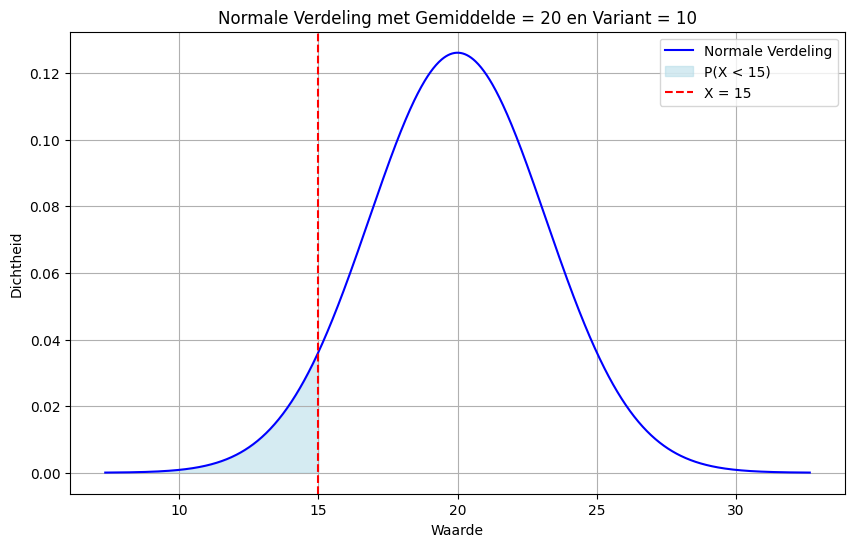

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Gemiddelde en standaardafwijking
mean = 20
variance = 10
std_dev = np.sqrt(variance)
# Waarden voor de x-as
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
# Normale verdeling
y = norm.pdf(x, loc=mean, scale=std_dev)
# Plot de normale verdeling
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normale Verdeling', color='blue')
# Highlight het gebied waar X < 15
x_fill = np.linspace(mean - 4*std_dev, 15, 100)
y_fill = norm.pdf(x_fill, loc=mean, scale=std_dev)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5, label='P(X < 15)')
# Labels en titel
plt.axvline(15, color='red', linestyle='--', label='X = 15')
plt.title('Normale Verdeling met Gemiddelde = 20 en Variant = 10')
plt.xlabel('Waarde')
plt.ylabel('Dichtheid')
plt.legend()
plt.grid()
# Toon de plot
plt.show()

In [ ]:
#%% Getting (exactly) 15 times head in 30 coin tosses.
print(binom.pmf(15, n=30, p=0.5))

#Dit betekent dat als je 30 keer een eerlijke munt opgooit, 
# er ongeveer 14.45% kans is dat je precies 15 keer kop gooit. 
# Dit resultaat is logisch binnen de context van de binomiale verdeling, 
# gezien dat de kans op kop en munt beide 50% zijn.


0.14446444809436781


In [26]:
#%% check this using simulation
print(np.mean(binom(n=30, p=0.5).rvs(10000000) == 15))

0.1445872


In [27]:
#%% Suppose that a soccer club has a 60% probability of winning each match they play.
# What is the probability that they do not win any of the first four matches of the year?
print(binom.pmf(0, n=4, p=0.6))
# or
print(binom.pmf(4, n=4, p=0.4))

0.025599999999999984
0.025600000000000005


In [19]:
#%% Calculate a quantile
# Suppose that the waiting time for the bus has an exponential distribution with scale 10. 
# How many minutes does one have to wait at least on the 5% worst days?
print(expon.ppf(1-0.05, scale=10))

29.9573227355399


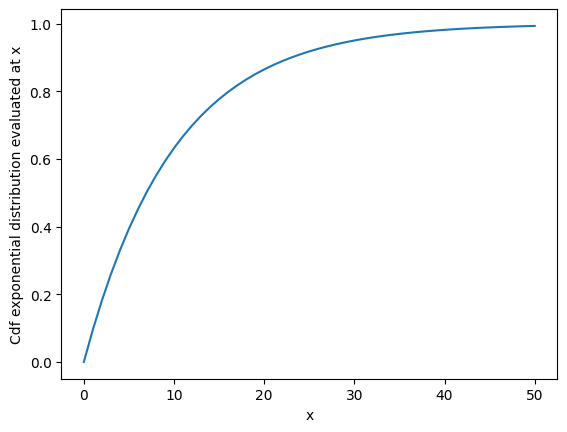

In [20]:
#%% Extra: plot the cdf of the exponential (also see Wikipedia for details on distributions)
x = np.arange(0, 51)
plt.plot(x, expon.cdf(x, scale=10))
plt.xlabel('x')
plt.ylabel('Cdf exponential distribution evaluated at x')
plt.show()

